### Configure data from last lecture

In [1]:
# Import the libraries 
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

# load the data
iris = datasets.load_iris()
np_data = iris['data']
np_target = iris['target']

print(np_data.shape)
print(np_target.shape)

# Combine data and target into a DataFrame
np_d = np.concatenate((np_data, np_target.reshape(-1,1)), axis = 1)
df=pd.DataFrame(data= np_d, columns= iris['feature_names'] + ['target'])
print(df.head(5))

(150, 4)
(150,)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [2]:
# ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
x = df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df.loc[:, 'target']


fs = SelectKBest(score_func=f_classif, k='all')  # call the method
FeaturesS = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)
print(FeaturesS.scores_)    # print out the scores 
print(FeaturesS.pvalues_)

# Correlation Coefficients
print(df.corr())

# chose petal length width as the predictor since it has the highest f-score
# also chose sepal width since has highest correl. w/ petal length

[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
[0. 0. 0. 0.]
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


In [8]:
# identify the features 
x_final = df.loc[:, ['sepal width (cm)', 'petal length (cm)']]

# import libraries
from sklearn.preprocessing import MinMaxScaler

# normalize
nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final) 
x_scaled

# notice the min and max of the x for these two features

array([[0.625     , 0.06779661],
       [0.41666667, 0.06779661],
       [0.5       , 0.05084746],
       [0.45833333, 0.08474576],
       [0.66666667, 0.06779661],
       [0.79166667, 0.11864407],
       [0.58333333, 0.06779661],
       [0.58333333, 0.08474576],
       [0.375     , 0.06779661],
       [0.45833333, 0.08474576],
       [0.70833333, 0.08474576],
       [0.58333333, 0.10169492],
       [0.41666667, 0.06779661],
       [0.41666667, 0.01694915],
       [0.83333333, 0.03389831],
       [1.        , 0.08474576],
       [0.79166667, 0.05084746],
       [0.625     , 0.06779661],
       [0.75      , 0.11864407],
       [0.75      , 0.08474576],
       [0.58333333, 0.11864407],
       [0.70833333, 0.08474576],
       [0.66666667, 0.        ],
       [0.54166667, 0.11864407],
       [0.58333333, 0.15254237],
       [0.41666667, 0.10169492],
       [0.58333333, 0.10169492],
       [0.625     , 0.08474576],
       [0.58333333, 0.06779661],
       [0.5       , 0.10169492],
       [0.

In [12]:
# check the effect of changing the k value
# fit the model
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2 )  

# The default value for metric and p are ‘minkowski’ and 2, which means using the Euclidean distance. These two parameters could be skipped. 
classifier.fit(x_scaled, y) 

KNeighborsClassifier(n_neighbors=1)

In [13]:
# make predictions for each of the points in xx, yy
xx, yy = np.meshgrid(np.arange(start = 0, stop = 1.01, step=0.01),np.arange(start=0, stop = 1.01, step = 0.01)) 
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

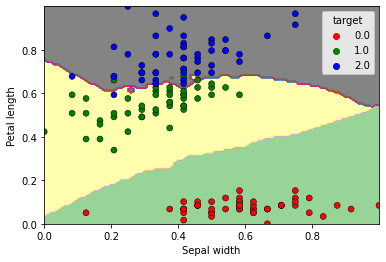

In [19]:
plot_knn(3)

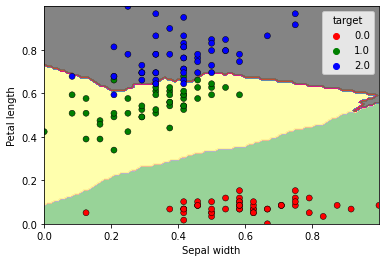

In [20]:
plot_knn(10)

### Cross-Validation
- splits data into k-folds and train the models k amount of times, rotating the training and testing sets
- each data point now being used for testing and training (more variation)

#### Without Cross Validation

In [15]:
# The limitation of a one-time train_test_split. Try to change the random_sate and 
# re-run this code to see how the accuracy_score changes.

# remember, random state = where to source the testing data when it is split -> gets a different set for each testing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=60, stratify=y)

# build model w/ the training data
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_train, y_train) 

# make prediction and evaluate accuracy
y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.8333333333333334

In [16]:
# see difference for when you change the random state
# we changed random state from 20 to 40, which affects the accuracy score
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=40, stratify=y)

# build model w/ the training data
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_train, y_train) 

# make prediction and evaluate accuracy
y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.9666666666666667

####  Finding the optimal K (no cross. val)

In [17]:
# find the average k value to get optimal k
k_values = []  # create a list to store the k-values
for i in range(1, 20):
    if i%3 !=0:    # k-value shall not be multiples of 3 beccause there are 3 classes. 
        k_values.append(i)
print(k_values)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]


#### Check Variance of Accuracy Scores w/ Different K-Values

In [18]:
k_accuracy_scores = []  # use this list to save the accuracy scores. 

for k in k_values:   # use a loop to iterate the k values. 
    from sklearn.model_selection import cross_val_score
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean()) 

# use a DataFrame to save k-values vs. each accuracy score. 
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy']) 

print(df_k_scores)
# with this result, the optimal k is 5. 

       k  accuracy
0    1.0  0.900000
1    2.0  0.886667
2    4.0  0.933333
3    5.0  0.953333
4    7.0  0.940000
5    8.0  0.940000
6   10.0  0.926667
7   11.0  0.933333
8   13.0  0.946667
9   14.0  0.946667
10  16.0  0.933333
11  17.0  0.946667
12  19.0  0.946667


### Cross-Validation

In [20]:
# make new model for cross validation
model1 = KNeighborsClassifier(n_neighbors=1)

# get cross val. scores for 10 data points - cv = k-fold
cv_scores = cross_val_score(model1, x_scaled, y, cv=10, scoring='accuracy')

In [21]:
# get cross val. score overall
print(cv_scores.mean())

0.9000000000000001


### Find Optimal K
- k-score that makes the highest accuracy score

In [22]:
# get all k values for each data point in the cross val
k = []
for i in range(1,20):
    if i%3 != 0:
        k.append(i)
print(k) # all k values

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]


In [24]:
# get the best k value (highest accuracy score)
acc_scores = [] # make a list of all scores to evaluate

# find k value that produces the highest accuracy score
for i in k:
    model1 = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model1, x_scaled, y, cv=10, scoring='accuracy')
    acc_scores.append(cv_scores.mean())
print(acc_scores)

[0.9000000000000001, 0.8866666666666667, 0.9333333333333333, 0.9533333333333334, 0.9400000000000001, 0.9400000000000001, 0.9266666666666665, 0.9333333333333332, 0.9466666666666667, 0.9466666666666667, 0.9333333333333333, 0.9466666666666667, 0.9466666666666667]


### Balance the Cross Validation Data by Stratify
#### Stratified K-Fold

In [27]:
from sklearn.model_selection import StratifiedKFold
k = StratifiedKFold(n_splits=10)

model1 = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(model1, x_scaled, y, cv=k, scoring='accuracy')
print(cv_scores)

[0.93333333 0.93333333 0.93333333 0.93333333 0.86666667 0.86666667
 0.93333333 1.         0.8        0.8       ]


#### Calculating Accuracy Score v Precision
- acc_score = total true pos + total true neg / overall total 
- recall = total true pos / total pos. 
- precision = true pos / true pos + false pos

- want true pos to be higher than false pos -> want precision score to be high
- recall score inputs all positive cases that we don't want to miss, cuts out false positive

### Pro v Con of KNN Algorithm for Prediction

**Pros**
- only two metrics for the alg. -> k value, distance metric (Eucledian dist.)
- work w. any num. of classes
- no training period (instance based learning) -> stores training dataset and learns at the time of prediction (faster than
linear regression, SVM, etc.)

**Cons**
- cost of predicting k-nearest is high
- doesn't work as expected when working w/ big num. of features/params.
- hard for categorical features